# <center>**Graded Challenge 2**</center>

* *Name* : Alexander Prasetyo Christianto
* *Age* : 23
* *Last Education Background* : *Electrical Engineering*
* *Occupation* : *Full Time Data Science Student Batch-001*

## Description

### Objective

This challenge is made to evaluate Statistics Descriptive and Inferential as follows:

- Able to get data using BigQuery
- Able to perform data processing before performing calculations
- Able to apply statistical descriptive and inferential concepts to a problem
- Able to understand the concepts of descriptive and inferential statistics

## Working Station Problem 1 (Statistics)

### Problem Statement

I am a member of the Data Science team at the Austin Smart City and am currently working on a project to analyze the city's waste management and disposal systems. As a team member, based on the available data, i am trying to analyze the data using descriptive and inferential statistics, and provide insight to the city of Austin regarding the state of the waste disposal and management system.

---

### SQL Query For the Dataset

SELECT report_date, load_time, load_type, load_weight, dropoff_site FROM `bigquery-public-data.austin_waste.waste_and_diversion`
WHERE report_date BETWEEN '2021-01-01' and '2021-07-09'

---

### Libraries Used

In this assignment, we are going to use several libraries. The libraries are `pandas`, `matplotlib`, `scipy`, `seaborn` and `numpy`. These libraries are used to help me in doing data analysis.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

---

### Data Loading and Dataset Preview

We load the data and set it into a new data frame named `df`.

In [74]:
df = pd.read_csv('datasetinibenerbro.csv')

In [75]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF


In [76]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


---

### Data Cleaning

Now the data is loaded into our workspace. Before we begin exploration and the analysis, it is required to do an overview of the dataset and handle any kind of missing value that may interfere with the process of data exploration and analysis.

In [77]:
df.shape

(26157, 5)

The command above is used to get a tuple representing the dimensionality of the DataFrame. There are 26157 rows and 5 columns in our data frame

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


The info() method prints information about the Data Frame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

Previously, by using '.shape' function, we know that we have 26157 rows in total, but there are 25109 rows in 'load_weight' column. It means that there are about a thousand rows have null values. Therefore, we will do the missing value handling on 'load_weight' column.

There are several methods to perform null value handling. The two most common methods are drop and fill.

The drop function will remove all null values in the dataset while the fill function will fill the null values with the desired value.

Before choosing the method to be used, I will do a little analysis of the dataset that has been loaded.

In [79]:
df[df.isna().any(axis=1)]

,report_date,load_time,load_type,load_weight,dropoff_site
18,2021-07-08,2021-07-08 10:20:00 UTC,SWEEPING,NaN,ONION CREEK
19,2021-07-08,2021-07-08 01:15:00 UTC,SWEEPING,NaN,ONION CREEK
20,2021-07-08,2021-07-08 12:40:00 UTC,SWEEPING,NaN,ONION CREEK
21,2021-07-08,2021-07-08 01:05:00 UTC,SWEEPING,NaN,ONION CREEK
22,2021-07-08,2021-07-08 12:30:00 UTC,SWEEPING,NaN,ONION CREEK
...,...,...,...,...,...
25698,2021-02-26,2021-02-26 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
25699,2021-02-26,2021-02-26 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
25700,2021-02-26,2021-02-26 12:50:00 UTC,SWEEPING,NaN,ONION CREEK
25701,2021-02-26,2021-02-26 08:15:00 UTC,SWEEPING,NaN,ONION CREEK


By using the `isna` function, I get the result that most of the null values come from the `load_type` column with category `SWEEPING`.

The `isna` function is used to find null values in the dataset and by using the `axis = 1` parameter, the search will be based on the columns in the dataset.

Next, I will calculate how significant is `load_type` sweeping is on the dataset in order to maintain the distribution of the data.

In [80]:
# count the number of times each category appears on `dropoff_site` in the dataset.

df['dropoff_site'].value_counts()

TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
WILCAB                       1
Name: dropoff_site, dtype: int64

In [81]:
# count the frequency of occurrence of each category on `load_type` in the dataset

df['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

After getting the `.value_count` result from the `dropoff_site` and `load_type` columns, it can be seen that the `SWEEPING` category in the `load_type` column has a large amount of data (1390 rows). Therefore, I chose the null value handling method using the `fillna` method.

Below I am displaying a data snippet from a dataset to display the `dropoff_site` location of the `SWEEPING` category.

In [82]:
show_dropoff_site_has_sweeping = df[
    (df["load_type"] == "SWEEPING") 
][["load_type", "load_weight", "dropoff_site"]]

show_dropoff_site_has_sweeping

,load_type,load_weight,dropoff_site
18,SWEEPING,NaN,ONION CREEK
19,SWEEPING,NaN,ONION CREEK
20,SWEEPING,NaN,ONION CREEK
21,SWEEPING,NaN,ONION CREEK
22,SWEEPING,NaN,ONION CREEK
...,...,...,...
25702,SWEEPING,NaN,ONION CREEK
25823,SWEEPING,1780.0,TDS LANDFILL
25824,SWEEPING,3000.0,TDS LANDFILL
26110,SWEEPING,7280.0,TDS LANDFILL


To see the full list of waste streams to each site run this:

In [83]:
dropoff_site_load_types = df.groupby('dropoff_site')['load_type'].unique()
for i in dropoff_site_load_types.index:
    print('\n{}: '.format(i))
    for j in dropoff_site_load_types[i]:
        print('\t{}'.format(j))


AUSTIN IRON AND METAL: 
	RECYCLED METAL

AUSTIN WOOD RECYCLING: 
	RECYCLING - SINGLE STREAM

BALCONES RECYCLING: 
	RECYCLING - SINGLE STREAM

BALCONES WOODS: 
	RECYCLING - SINGLE STREAM

GREAT NORTHERN: 
	SWEEPING
	GARBAGE COLLECTIONS

HORNSBY BEND: 
	BRUSH
	GARBAGE COLLECTIONS
	YARD TRIMMING
	ORGANICS

MRF: 
	TIRES
	BULK
	RECYCLED METAL

ON ROUTE HIGH DUMP: 
	ORGANICS
	SWEEPING

ONION CREEK: 
	SWEEPING

ORGANICS BY GOSH: 
	ORGANICS
	DEAD ANIMAL
	RECYCLED METAL
	SWEEPING
	GARBAGE COLLECTIONS

PARK BEND: 
	ORGANICS

PARK CENTER: 
	SWEEPING

ST. EDWARDS: 
	SWEEPING

STEINER LANDFILL: 
	GARBAGE COLLECTIONS

TDS - MRF: 
	RECYCLING - SINGLE STREAM
	GARBAGE COLLECTIONS
	BULK
	LITTER

TDS LANDFILL: 
	BULK
	DEAD ANIMAL
	ORGANICS
	GARBAGE COLLECTIONS
	MIXED LITTER
	SWEEPING
	LITTER
	CONTAMINATED RECYCLING
	TIRES
	CONTAMINATED ORGANICS
	RECYCLING - SINGLE STREAM
	BRUSH
	RECYCLED METAL

WESTFIELD: 
	GARBAGE COLLECTIONS

WILCAB: 
	SWEEPING


In [84]:
dropoff_site_load_types

dropoff_site
AUSTIN IRON AND METAL                                     [RECYCLED METAL]
AUSTIN WOOD RECYCLING                          [RECYCLING - SINGLE STREAM]
BALCONES RECYCLING                             [RECYCLING - SINGLE STREAM]
BALCONES WOODS                                 [RECYCLING - SINGLE STREAM]
GREAT NORTHERN                             [SWEEPING, GARBAGE COLLECTIONS]
HORNSBY BEND             [BRUSH, GARBAGE COLLECTIONS, YARD TRIMMING, OR...
MRF                                          [TIRES, BULK, RECYCLED METAL]
ON ROUTE HIGH DUMP                                    [ORGANICS, SWEEPING]
ONION CREEK                                                     [SWEEPING]
ORGANICS BY GOSH         [ORGANICS, DEAD ANIMAL, RECYCLED METAL, SWEEPI...
PARK BEND                                                       [ORGANICS]
PARK CENTER                                                     [SWEEPING]
ST. EDWARDS                                                     [SWEEPING]
STEINER LAND

I assume the `SWEEPING` category in `load_type` is an activity such as sweeping the streets or sweeping a certain site. Hence there is no load to be carried. And because of that I will fill the null value in the `SWEEPING` category with a value of 0.

In [85]:
df['load_weight'] = df['load_weight'].fillna(0)

---

After the dataset is cleared of null values, I will now calculate the central tendency of the dataset.

Central Tendency is a value that shows the midpoint of a dataset to find out where the position of many data values gather in the distribution. The Mean, Median, and Mode values are the most commonly used measures of Central Tendency. All three indicate the location of data collection, but with different methods and meanings.

In [86]:
mode = df.groupby('dropoff_site')['load_weight'].apply(pd.Series.mode)
mean = df.groupby('dropoff_site')['load_weight'].apply(pd.Series.mean)
median = df.groupby('dropoff_site')['load_weight'].apply(pd.Series.median)

I have assigned the calculated mean, median, and mode of each site in the `dropoff_site` column of the `mean`, `median`, and `mode` variables. If you want to see the results of the calculations, all you need to do is call the three variables.

In [87]:
mode

dropoff_site            
AUSTIN IRON AND METAL  0      260.0
                       1      320.0
                       2      520.0
AUSTIN WOOD RECYCLING  0     2340.0
                       1     5760.0
BALCONES RECYCLING     0    11880.0
BALCONES WOODS         0     8460.0
GREAT NORTHERN         0        0.0
HORNSBY BEND           0     5500.0
MRF                    0      960.0
ON ROUTE HIGH DUMP     0        0.0
ONION CREEK            0        0.0
ORGANICS BY GOSH       0    14580.0
PARK BEND              0     8480.0
                       1     8960.0
                       2    15700.0
                       3    20400.0
PARK CENTER            0        0.0
ST. EDWARDS            0        0.0
STEINER LANDFILL       0      780.0
TDS - MRF              0    10360.0
TDS LANDFILL           0       20.0
                       1       60.0
                       2    12020.0
WESTFIELD              0    16020.0
WILCAB                 0        0.0
Name: load_weight, dtype: float64

In [88]:
mean

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN            1641.714286
HORNSBY BEND              6616.628399
MRF                       1799.982143
ON ROUTE HIGH DUMP        1082.469136
ONION CREEK                  0.000000
ORGANICS BY GOSH         11789.731712
PARK BEND                13385.000000
PARK CENTER                  0.000000
ST. EDWARDS                  0.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15165.151724
WESTFIELD                16020.000000
WILCAB                       0.000000
Name: load_weight, dtype: float64

In [89]:
median

dropoff_site
AUSTIN IRON AND METAL      400.0
AUSTIN WOOD RECYCLING     4050.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
GREAT NORTHERN               0.0
HORNSBY BEND              6380.0
MRF                       1360.0
ON ROUTE HIGH DUMP           0.0
ONION CREEK                  0.0
ORGANICS BY GOSH         11900.0
PARK BEND                12330.0
PARK CENTER                  0.0
ST. EDWARDS                  0.0
STEINER LANDFILL           780.0
TDS - MRF                10330.0
TDS LANDFILL             14920.0
WESTFIELD                16020.0
WILCAB                       0.0
Name: load_weight, dtype: float64

From calculating the central tendency for each dropoff site, we may get information about something like **a glimpse of the data distribution**.

For example, i will take the mean and median of `AUSTIN IRON AND METAL`. The mean is 451.2 kg and the median is 400 kg. It is possible that the weight of the waste disposed of in `AUSTIN IRON AND METAL` varies each time it receives disposal so that there is a difference between the median and the average. 

Below I have also searched the mode for the `load_type` column as this column is a categorical column so it makes more sense to look for the mode in this column.

In [90]:
modus_loadtype = df.groupby('dropoff_site')['load_type'].apply(pd.Series.mode)
modus_loadtype

dropoff_site            
AUSTIN IRON AND METAL  0               RECYCLED METAL
AUSTIN WOOD RECYCLING  0    RECYCLING - SINGLE STREAM
BALCONES RECYCLING     0    RECYCLING - SINGLE STREAM
BALCONES WOODS         0    RECYCLING - SINGLE STREAM
GREAT NORTHERN         0                     SWEEPING
HORNSBY BEND           0                        BRUSH
MRF                    0                        TIRES
ON ROUTE HIGH DUMP     0                     SWEEPING
ONION CREEK            0                     SWEEPING
ORGANICS BY GOSH       0                     ORGANICS
PARK BEND              0                     ORGANICS
PARK CENTER            0                     SWEEPING
ST. EDWARDS            0                     SWEEPING
STEINER LANDFILL       0          GARBAGE COLLECTIONS
TDS - MRF              0    RECYCLING - SINGLE STREAM
TDS LANDFILL           0          GARBAGE COLLECTIONS
WESTFIELD              0          GARBAGE COLLECTIONS
WILCAB                 0                     SWEEPING
Nam

---

Now I will analyze the `TDS Landfill` site from the `dropoff_site` column because `TDS Landfill` is the `dropoff_site` which has the highest dropoff frequency.

I am slicing `TDS Landfill` data from variable `df` into a new variable called `tds_landfill`.

In [91]:
tds_landfill = df[df['dropoff_site']=='TDS LANDFILL']

Now I will further analyze the data already stored in the `tds_landfill` variable.

The analysis that will be carried out is to calculate the central tendency, the value of the first quartile, the third quartile and also the standard deviation of the variable `tds_landfill`. This is done to see the distribution of data in `tds_landfill`.

In [92]:
a = tds_landfill['load_weight'].mean()
b = tds_landfill['load_weight'].median()
c = tds_landfill['load_weight'].mode()
tds_landfill['load_weight'].std()
tds_landfill['load_weight'].min()
tds_landfill['load_weight'].max()
q1 = tds_landfill['load_weight'].quantile(q=0.25)
q3 = tds_landfill['load_weight'].quantile(q=0.75)
iqr = tds_landfill['load_weight'].quantile(q=0.75) - tds_landfill['load_weight'].quantile(q=0.25)

The following is the result of the above calculation in the `load_weight` column in the `tds_landfill` data.

- mean = 15165.1517 kg
- std = 8593.5800 kg
- median = 14920 kg
- q1 = 8820 kg
- q3 = 21660 kg
- min = 0 kg
- max = 245540.0 kg

Now I will calculate the skew value in the `load_weight` column of the `tds_landfill` data. This skew value is used to determine whether a data has a normal or skewed data distribution. If the skew value is above 0.5 to 1 then the data is right skewed data, while if the skew value is below -0.5 to -1 then the data distribution is left skewed.

**Put it simply, the load weight data at TDS Landfill is not evenly distributed.**

In [93]:
print(tds_landfill['load_weight'].skew())

3.69050338333085


Because the `tds landfill` data has a skewness value of 3.69050, the data has a right skewed distribution.

To provide a better visualization of the `tds_landfill` data, I will plot the `tds_landfill` data.

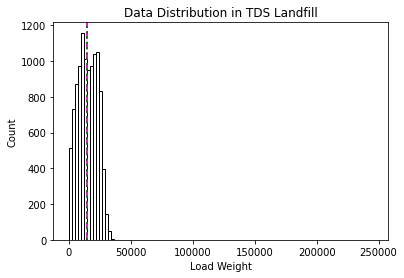

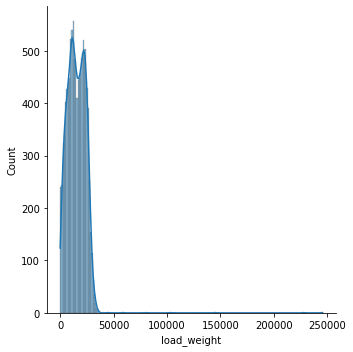

In [94]:
### HISTOGRAM DENGAN AXIS LINE
lw = tds_landfill['load_weight']
plt.hist(tds_landfill['load_weight'], color = 'white', edgecolor = 'black',
         bins = int(500/5))

plt.title('Data Distribution in TDS Landfill')
plt.xlabel('Load Weight')
plt.ylabel('Count')
plt.axvline(lw.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(lw.median(), color='green', linestyle='dotted', linewidth=2)
plt.show


### displot
sns.displot(tds_landfill.load_weight, kde=True, label='Load Weight in TDS Landfill')

<AxesSubplot:ylabel='load_weight'>

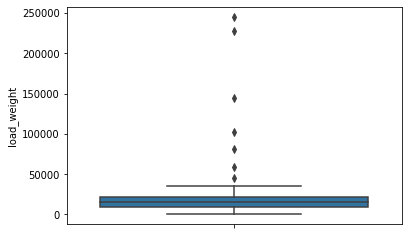

In [95]:
sns.boxplot(data=tds_landfill, y='load_weight')

Because the `tds_landfill` data has a right skewed data distribution, there are outliers in the `tds_landfill` data. Outliers are data points that are far from other data points.

The next step to be taken is to handle the outliers.

Some popular concepts for handling the outliers are:

- Dropping the outliers - it prevents skewing of the data
- Cap them - i.e. define a max/min point and assign that value to the outlier. This holds if the data suggests that after some point the bigger/smaller value did not change the outcome.
- Double check them - they could be wrong. In that case, you may input as missing/mean/median value.
- Change the scale - use normalization, etc.



In the `tds_landfill` data, the number of outliers in the data only adds up to 7 data. Data `tds_landfill` has a total of 10694 rows of data. **The percentage of extreme value is 0.06% of the total data**. The number of extreme value is still very small when compared to the total amount of data. So I will use the capping method to handle the extreme values. 

Since the `tds_landfill` data is right skewed, the way to detect outliers is to look for values that are above the IQR (Interquartile Range). The formula is Q3 + (1.5 * IQR)

In [96]:
max_for_outlier = q3 + (1.5*iqr)
print (max_for_outlier)

40920.0


Below is the data that is an outlier in the `tds_landfill` data.

In [97]:
tds_landfill[tds_landfill['load_weight']>40920.0]

,report_date,load_time,load_type,load_weight,dropoff_site
2381,2021-03-09,2021-03-09 01:30:00 UTC,GARBAGE COLLECTIONS,145160.0,TDS LANDFILL
5507,2021-03-29,2021-03-29 05:08:00 UTC,GARBAGE COLLECTIONS,58600.0,TDS LANDFILL
13632,2021-05-26,2021-05-26 11:40:00 UTC,GARBAGE COLLECTIONS,80697.0,TDS LANDFILL
13817,2021-05-27,2021-05-27 11:33:00 UTC,GARBAGE COLLECTIONS,245540.0,TDS LANDFILL
16964,2021-06-21,2021-06-21 01:05:00 UTC,GARBAGE COLLECTIONS,227780.0,TDS LANDFILL
19960,2021-01-07,2021-01-07 02:45:00 UTC,GARBAGE COLLECTIONS,44980.0,TDS LANDFILL
24239,2021-02-09,2021-02-09 01:08:00 UTC,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL


The following is a boxplot to see the distribution of data with existing outliers.

<AxesSubplot:ylabel='load_weight'>

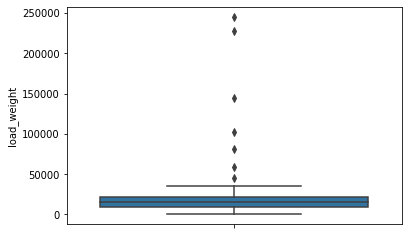

In [98]:
sns.boxplot(data=tds_landfill, y='load_weight')

The command below will do the capping of the existing outliers

In [99]:
tds_landfill["load_weight"] = np.where(tds_landfill['load_weight']>40920.0, 40920.0,tds_landfill['load_weight'])

C:\Users\alexa\AppData\Local\Temp\ipykernel_27472\2276956327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tds_landfill["load_weight"] = np.where(tds_landfill['load_weight']>40920.0, 40920.0,tds_landfill['load_weight'])


Below is the plotting of `tds_landfill` data after capping.

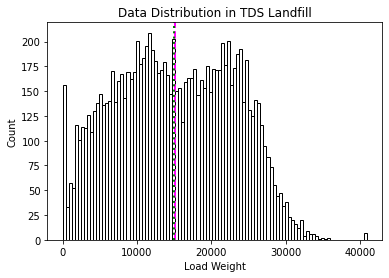

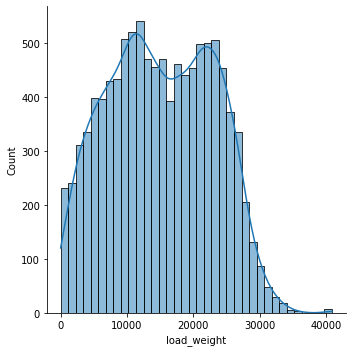

In [100]:
### HISTOGRAM DENGAN AXIS LINE
lw = tds_landfill['load_weight']
plt.hist(tds_landfill['load_weight'], color = 'white', edgecolor = 'black',
         bins = int(500/5))

plt.title('Data Distribution in TDS Landfill')
plt.xlabel('Load Weight')
plt.ylabel('Count')
plt.axvline(lw.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(lw.median(), color='green', linestyle='dotted', linewidth=2)
plt.show


### displot
sns.displot(tds_landfill.load_weight, kde=True, label='Load Weight in TDS Landfill')

Below is the skewness value of the `tds_landfill` data after capping.

In [101]:
print(tds_landfill['load_weight'].skew())

0.03433380896786613


In [102]:
d = tds_landfill['load_weight'].mean()
e= tds_landfill['load_weight'].median()
f = tds_landfill['load_weight'].mode()

**The following is a comparison of the mean, median, and mode of the data `tds_landfill` with outliers and `tds_landfill` without any extreme values.**

In [103]:
comparison_1 = pd.DataFrame({'Data Condition': ['With Outliers', 'Without Outliers'],
                   'Mean':[a,d],
                   'Median':[b,e],
                   'Modus':[c,f]
                   })
comparison_1

,Data Condition,Mean,Median,Modus
0,With Outliers,15165.151724,14920.0,0 20.0 1 60.0 2 12020.0 Name: l...
1,Without Outliers,15107.269080,14920.0,0 20.0 1 60.0 2 12020.0 Name: l...


Since the data is clear of extreme values, I will now calculate the range, variance, and standard deviation values.

In [104]:
max_tds_landfill = tds_landfill['load_weight'].max()
min_tds_landfill = tds_landfill['load_weight'].min()

range_tds_landfill = max_tds_landfill - min_tds_landfill

std_tds_landfill = tds_landfill['load_weight'].std()
var_tds_landfill = tds_landfill['load_weight'].var()


Based on the results of the above calculations, the values obtained are:

- Range = 40920.0 kg
- Standard deviation = 7882.3780
- Variance = 621318843887 kg

**From the results above, the information obtained is the diversity of the weight of waste disposal at the TDS Landfill site, the value of waste disposal at the TDS Landfill is far from the average value.**


The standard deviation is derived from variance and tells you, on average, how far each value lies from the mean.

Both measures reflect variability in a distribution, but their units differ:

- **Standard deviation** is expressed in the same units as the original values (e.g., meters).
- **Variance is expressed** in much larger units (e.g., meters squared)

Since the units of variance are much larger than those of a typical value of a data set, it’s harder to interpret the variance number intuitively. That’s why standard deviation is often preferred as a main measure of variability.

However, the variance is more informative about variability than the standard deviation, and it’s used in making statistical inferences.

---

Now if the city government plans to add a new site. I have to provide analysis and suggestions regarding the amount of storage capacity at the new site based on the calculation of the confidence interval. What data do I use you may ask. Is it only from one site or from the whole site?

In my perspective, it would make more sense and fit the facts if the new site capacity was taken from the average of all drop off sites. With a note, the average drop off site value used is the average that has been cleared of outliers

The analytical steps to be carried out are in accordance with the analysis stages carried out in the `tds_landfill` data analysis. 

The analysis steps to be carried out are in accordance with the analysis stages carried out in the `tds_landfill` data analysis. Briefly, the steps are as follows:

- Find the skew value
- View data distribution
- Choose the outlier handling method

Below is calculating `df` skewness :

In [105]:
df['load_weight'].skew()

2.899277178790662

The skew value is 2.89

<AxesSubplot:ylabel='load_weight'>

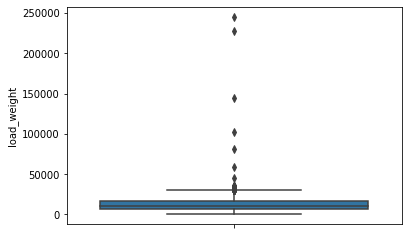

In [106]:
sns.boxplot(data=df, y='load_weight')

<function matplotlib.pyplot.show(close=None, block=None)>

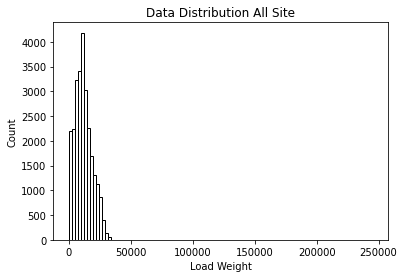

In [107]:
no7 = df['load_weight']
plt.hist(df['load_weight'], color = 'white', edgecolor = 'black',
         bins = int(500/5))

plt.title('Data Distribution All Site')
plt.xlabel('Load Weight')
plt.ylabel('Count')
plt.show

I am going to use capping method to handle the outliers.

In [108]:
a1 = df['load_weight'].mean()
b1 = df['load_weight'].median()
c1 = df['load_weight'].std()
df['load_weight'].min()
df['load_weight'].max()
q1_all_site = df['load_weight'].quantile(q=0.25)
q3_all_site = df['load_weight'].quantile(q=0.75)
iqr_all_site = df['load_weight'].quantile(q=0.75) - df['load_weight'].quantile(q=0.25)

In [109]:
max_outlier_for_all_site = q3_all_site + (1.5*iqr_all_site)
print(max_outlier_for_all_site)

30460.0


Here I capped the upper outliers

In [110]:
df["load_weight"] = np.where(df['load_weight']>30460.0, 30460.0,df['load_weight'])

In [111]:
df['load_weight'].skew()

0.4540237194735292

In [112]:
d1 = df['load_weight'].mean()
e1 = df['load_weight'].median()
f1 = df['load_weight'].std()

And, lastly, I give the comparison of old `df` with the new `df`.

In [113]:
comparison_2 = pd.DataFrame({'Data Condition': ['With Outliers', 'Without Outliers'],
                   'Mean':[a1,d1],
                   'Median':[b1,e1],
                   'STD':[c1,f1]
                   })

comparison_2

,Data Condition,Mean,Median,STD
0,With Outliers,11737.246838,11000.0,7390.497943
1,Without Outliers,11703.781341,11000.0,7018.028180


Here is the plot from the new `df`

<function matplotlib.pyplot.show(close=None, block=None)>

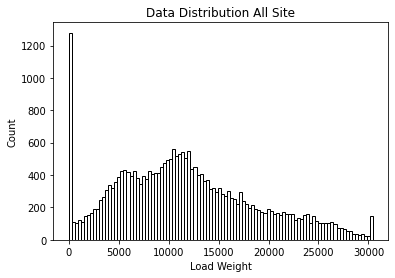

In [114]:
no7 = df['load_weight']
plt.hist(df['load_weight'], color = 'white', edgecolor = 'black',
         bins = int(500/5))

plt.title('Data Distribution All Site')
plt.xlabel('Load Weight')
plt.ylabel('Count')
plt.show

As can be seen from the graph above, the data distribution is normal

<AxesSubplot:ylabel='load_weight'>

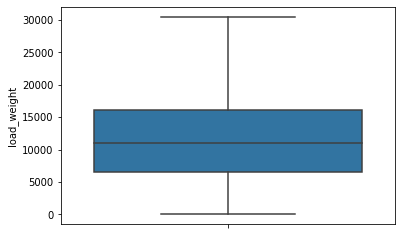

In [115]:
sns.boxplot(data=df, y='load_weight')

---

Furthermore, because the `df` data is clear of outliers, we can calculate the confidence interval for the garbage load capacity for the new drop off site.

CI (Confidence Interval) is a range of values where 95% of the garbage load that has occurred is in that range.

In [116]:
ci = stats.norm.interval(0.95, df['load_weight'].mean(), df['load_weight'].std())
ci

(-2051.3011340955272, 25458.863816314435)

Based on the calculation results above, **the load weight capacity for the new site can be valued greater equal to 25458.86 kg**.

Why do I provide this range of values? This is because the calculation is based on the average load weight of all waste disposal sites. So, I am suggesting a value for the capacity of the new waste disposal site that is within the range of the average weight of the waste disposal site, that would result in a possibility of an overload at the new waste disposal site. And I am pretty sure that the government do not want that to happen.

Here is the plot for the confidence interval

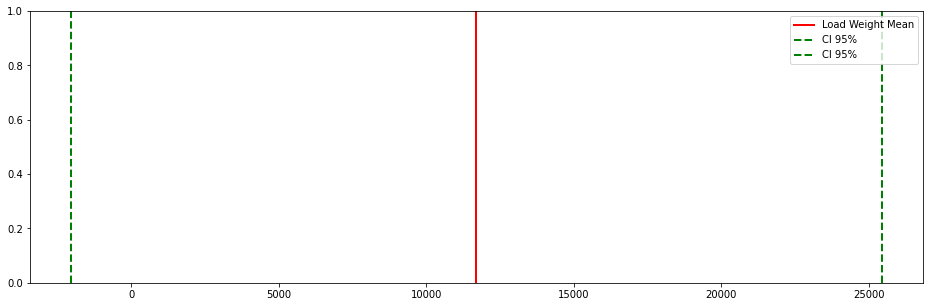

In [117]:
plt.figure(figsize=(16,5))
plt.axvline(df['load_weight'].mean(), color='red', linewidth=2, label='Load Weight Mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='CI 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='CI 95%')
plt.legend()

---

We know that in our data `df` has been cleaned from any outliers. Now, I want to know is the average `load_weight` on the `df` data significantly different from 11000 kg?

From that case we may find the answer by using hypothesis testing. Hypothesis testing is a formal procedure for investigating our ideas about the world using statistics. It is most often used by scientists to test specific predictions, called hypotheses, that arise from theories.

There are 5 main steps in hypothesis testing:

- State your research hypothesis as a null hypothesis and alternate hypothesis (Ho) and (Ha or H1).
- Collect data in a way designed to test the hypothesis.
- Perform an appropriate statistical test.
- Decide whether to reject or fail to reject your null hypothesis.
- Present the findings in your results and discussion section.

Here's my case : is the average `load_weight` on the `df` data significantly different from 11000 kg?

- Ho : Mean `df` = 11000 kg
- H1 : Mean `df` != 11000 kg

Note that 11000 kg is the median of `load_weight` from data `df`.

I am going to use T-Test 1 sample 2 tailed method for the hypothesis testing

In [118]:
# ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(df['load_weight'], 11000)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 7.20869387944671e-59
t-statistics: 16.2187211478769


Based on the results of calculation above, it can be indicated that H0 is rejected so that it can be concluded that the average `load_weight` on `df` is significantly different from 11000 kg (median of `load_weight`).

From this hypothesis testing test, it can provide information such as there will be differences in data analysis based on the average and data analysis based on the median and the data is not distributed evenly. This is because **the mean and median have significant differences**.

---

#### Answering Questions

1. What technique did you choose for handling outliers? Explain why!

    - To handle outliers, I chose the capping method for both `tds_landfill` data and `df` data. This is because I want to avoid losing important data or having a significant influence on the characteristics of the data.


2. What is the concept behind the confidence interval so that we can use it to complete step 7?

    - A confidence interval is a range of values that describes the uncertainty surrounding an estimate. In my case, I set my confidence interval level to 95%, this indicates a level of certainty about our estimate. If we were to repeatedly make new estimates using exactly the same procedure, the confidence intervals would contain the average of all the estimates 95% of the time.
    - Simpler meaning is confidence intervals are one way to represent how "good" an estimate is; the larger a 90% confidence interval for a particular estimate, the more caution is required when using the estimate.


3. Explain what type of hypothesis test you used and why?

    - I used the T-test One Sample method because the one sample t test compares the mean of your sample data to a known value.

## Working Station Problem 2 (Math / Calculus)

### Problem Statement

The government wants to know how much garbage is loaded in kg in Austin the next day (10 July 2021). In this case, the government wants you to do forecasting to predict future values. There are many forecasting techniques that can be done but you don't need to worry, we will use a very simple method, namely using the velocity formula.

Assume that the rate of daily addition of waste can be written using the following formula:

<img src="https://latex2png.com/pngs/d095b902113a1ef68d07fd786e4be428.png"></img>

where `1` is today's notation and `0` is yesterday's notation.

If we want to predict the amount of garbage load tomorrow, we can use the formula:

<img src="https://latex2png.com/pngs/50dc63299a1860b10a15346a9ca3a42e.png"></img>

Where `v` will be calculated using the first derivative of the `load_weight` data which previously had to be grouped by `report_date` and don't forget after that `report_date` must be sorted from the smallest to the largest date. `Δt` **values 1** because it only wants to predict the value in one day ahead.

**Additional note**: To calculate the derivative, the x and y axes must be determined first. Set `load_weight` as the y-axis and for the x-axis, you can use the index of the groupby result dataframe if the index is a sequence number from 0 to N-1. If not, you can create it using `range()`.

To simplify it, the problem statement in this second math problem is to predict the `load_weight` value for 10 July 2021 by using the provided formula.

### Libraries and Data

We are still going to use the same libraries and dataset from the previous part.

---

First of all, we will group by `report_date` column and add up the total load weight for each day and convert the grouping results into a dataframe which is then stored in the `forecasting` variable

In [119]:
forecasting = df.groupby('report_date')['load_weight'].sum().to_frame()
forecasting

,load_weight
report_date,
2021-01-01,0.0
2021-01-02,2168970.0
2021-01-04,2920260.0
2021-01-05,2386480.0
2021-01-06,2396470.0
...,...
2021-07-05,1895650.0
2021-07-06,1917880.0
2021-07-07,1553080.0


After that, according to the instructions described in the problem statement section, the next step is to differentiate `load_weight` against `Δt`.

In [120]:
v = np.diff(forecasting['load_weight'])/np.diff(range(166))
v

array([ 2.16897000e+06,  7.51290000e+05, -5.33780000e+05,  9.99000000e+03,
        2.73400000e+04, -5.78860000e+05, -1.81681000e+06,  2.46847000e+06,
       -4.22690000e+05, -5.34000000e+03, -3.57300000e+04, -3.15860000e+05,
       -1.68213000e+06,  2.40679000e+06, -2.67790000e+05, -7.87300000e+04,
       -2.97600000e+04, -2.86770000e+05, -1.59572000e+06,  2.31477000e+06,
       -4.40200000e+05,  3.03900000e+04,  3.62200000e+04, -3.88890000e+05,
       -1.73503000e+06,  2.43934000e+06, -3.60920000e+05, -8.66800000e+04,
        1.16700000e+05, -3.72670000e+05, -1.73345000e+06,  1.17200000e+04,
        2.60815000e+06, -5.67170000e+05,  3.83400000e+04, -1.31158000e+06,
        1.08996000e+06, -1.83900000e+06,  1.04962000e+06,  2.64604000e+06,
       -4.98040000e+05,  6.87700000e+04,  6.19100000e+04, -9.55240000e+05,
       -2.16796000e+06,  1.59200000e+04,  2.95084000e+06, -2.95220000e+05,
       -1.06840000e+05, -3.83200000e+04, -3.55245000e+05, -2.17379500e+06,
       -5.08200000e+04,  

And If I want to predict the amount of garbage load tomorrow, below here is the formula:

In [121]:
W_tomorrow = forecasting['load_weight'][-1] + v[-1] * 1
abs(W_tomorrow)

1176970.0

By the calculation above, in 10th July 2021 is predicted will be having **1176970.0.0 kg** of garbage.

---

#### Answering Questions



1. To calculate the first derivative can be used symbolic and numerical methods, for this case, what technique do you use?
    - I used numerical method to calculate the first derivative.
2. Do you need a mathematical function to calculate the derivative? (yes/no) give your reasons!
    - Yes. Because the derivative is the instantaneous rate of change of a function with respect to one of its variables.
3. How much load weight do you expect tomorrow (10 July 2021)?
    - I estimate there will be **1176970.0.0 kg** of garbage

## Analysis Points

- The method I used to handle the null value is filling with 0 because I assume the `SWEEPING` category in `load_type` is an activity such as sweeping the streets or sweeping a certain site.
- Central tendency gives us an information about a glimpse of the data distribution.
- By analyzing `TDS Landfill` site, it tells us that it is the most frequently dumped destination for landfills in Austin. Before censoring extreme values the data of `TDS Landfill`, it has a right skewed distribution. And after censoring the extreme values, the load weight that is dumped in `TDS Landfill` differs because :
    - Range = 40920.0 kg
    - Standard deviation = 7882.3780 kg
    - Variance = 621318843887 kg
- If the government wants to add a new dropoff site, i suggest that the new site has a capacity greater equal to 25458.86 kg. This was done by calculating the confidence interval of the average load weight of all dropoff sites that have been cleaned of extreme values.
- The results of the hypothesis test that I did provide information that the average and median load weight values in all dropoff sites are significantly different.
- I estimate there will be 1176970.0.0 kg of garbage in 10th July 2021.